# Basic Project: 

( This project was one of the tasks for a course that I did on ML and Data Science)

This is a copy of UCI ML Cancer Wisconsin (Diagnostic) datasets. Features are computed from a digitized image of a fine needle aspirate (FNA) of a mass. They describe characteristics of the cell nuclei present in the image.

The aim is to predict whether the cancer is benign or malignant.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [38]:
# Now we perform some basic exploratory data analysis : 

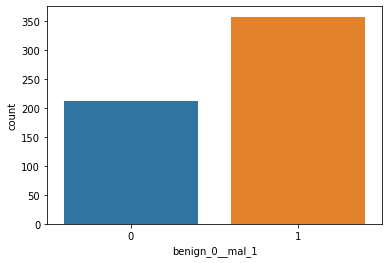

In [5]:
sns.countplot(x = 'benign_0__mal_1',data = df)

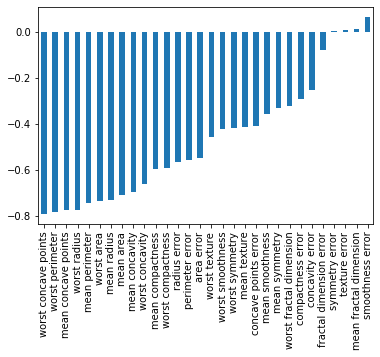

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

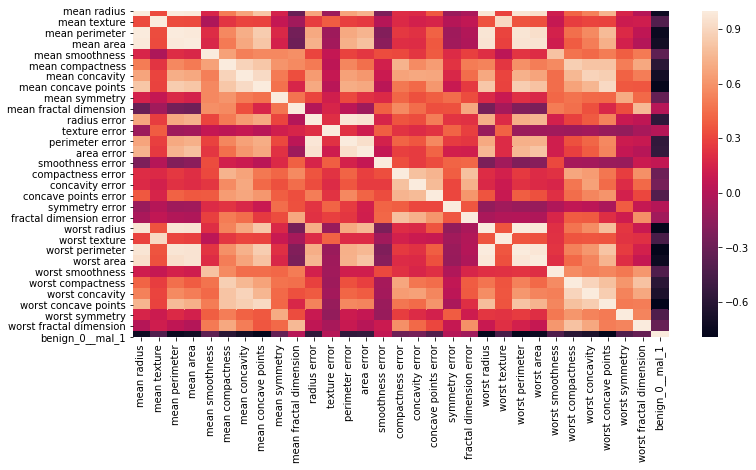

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [8]:
# Train test split :
X = df.drop('benign_0__mal_1',axis = 1)
y = df['benign_0__mal_1']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scale = MinMaxScaler()

In [13]:
scale.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
X_train.shape

(426, 30)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 15)

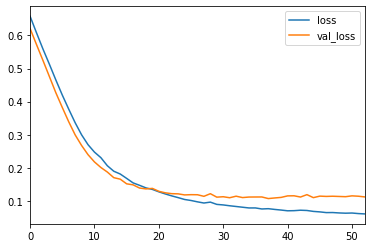

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [28]:
# now lets use Dropout layers which drop a certain percentage of neurons to prevent overfitting

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
# We use droput along with EarlyStoppin to minimize overfitting as much as possible
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6958 - val_loss: 0.6862
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6884 - val_loss: 0.6671
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6616 - val_loss: 0.6486
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6361 - val_loss: 0.6224
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6132 - val_loss: 0.5935
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6002 - val_loss: 0.5675
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5633 - val_loss: 0.5432
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5462 - val_loss: 0.5123
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5012 - val_loss: 0.4719
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5061 - val_loss: 0.4387
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1283 - val_loss: 0.1010
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1117 - val_loss: 0.1087
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1135 - val_loss: 0.1022
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.1026
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1141 - val_loss: 0.1001
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.1267
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.1152
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1120
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1200 - val_loss: 0.1071
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 0.1024
Epoch 93/600


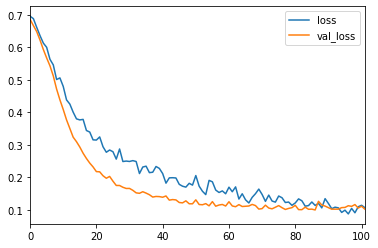

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [33]:
# Hence in the above diagram our model has perfromed even better than standard loss.

In [34]:
# Now we predict our classes using test data :

In [35]:
preds = model.predict_classes(X_test)

# We use predict_classes instead of predict as we are predicting a class over here.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Hence our model has performed pretty good